In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from num2words import num2words
from sklearn.feature_extraction.text import TfidfVectorizer

import os
import numpy as np
import pandas as pd
import re


In [5]:
def convert_lower_case(data):
    return np.char.lower(data)

In [6]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [7]:
def remove_punctuation(data):
    symbols = "!\"$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], " ")
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ",", "")
    return data

In [8]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")


In [9]:
def stemming(data):
    stemmer = PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [10]:
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0 
#             w = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [11]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data)
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) # needed again as we need to stem the words
    data = remove_punctuation(data) # needed again as num2word is giving few ...
    data = remove_stop_words(data) # needed again as num2word is giving stopwords
    return data

In [13]:
! pip install beautifulsoup4

You should consider upgrading via the 'D:\TIP\courses\CS 405\module_5\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [14]:
!pip install requests

You should consider upgrading via the 'D:\TIP\courses\CS 405\module_5\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [15]:
!pip install urllib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib
You should consider upgrading via the 'D:\TIP\courses\CS 405\module_5\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [16]:
urls_to_scrape = [
    "https://www.politifact.com/factchecks/2021/aug/06/tom-tiffany/tiffany-misses-point-behind-why-prices-are-rising-/",
    "https://www.politifact.com/factchecks/2021/aug/05/facebook-posts/getting-fired-over-vaccine-mandate-may-cost-you-un/",
    "https://www.politifact.com/factchecks/2021/aug/05/facebook-posts/pro-capitalism-quote-misattributed-abraham-lincoln/",
    "https://www.politifact.com/factchecks/2021/aug/05/facebook-posts/feds-did-not-drop-immigrants-illegally-country-mex/",
    "https://www.politifact.com/factchecks/2021/aug/05/bob-good/contrary-good-masks-have-been-shown-limit-covid-sp/",
    "https://www.politifact.com/factchecks/2021/aug/05/rodney-davis/no-pelosi-was-not-calling-all-shots-capitol-securi/",
    "https://www.politifact.com/factchecks/2021/aug/04/instagram-posts/cdc-did-not-say-vaccines-are-failing-or-vaccinated/",
    "https://www.politifact.com/factchecks/2021/aug/04/viral-image/covid-19-its-safer-be-unvaccinated-several-ways-s-/",
    "https://www.politifact.com/factchecks/2021/aug/04/facebook-posts/claim-ivermectin-bringing-down-covid-19-mortality-/",
    "https://www.politifact.com/factchecks/2021/aug/04/rick-scott/rick-scotts-false-claim-biden-democrats-have-done-/",
    "https://www.politifact.com/factchecks/2021/aug/04/facebook-posts/fauci-did-not-say-there-was-covid-19-variant-can-e/",
    "https://www.politifact.com/factchecks/2021/aug/04/rebecca-kleefisch/no-evers-didnt-say-wisconsin-was-permanently-close/"
]

article_path = "article.m-textblock > p"

In [39]:
from bs4 import BeautifulSoup
import urllib.request,sys,time
import requests
import pandas as pd
import time


In [30]:
url = 'https://www.politifact.com/factchecks/2021/aug/05/facebook-posts/pro-capitalism-quote-misattributed-abraham-lincoln/'

page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')



In [38]:
my_list = soup.select(article_path)
for item in my_list:
    print("!!")
    print(item.get_text())

!!

Two years and 11 days ago, a social media post brought forth upon Facebook another quote falsely attributed to Abraham Lincoln.
The July 25, 2019, post pairs an image of Lincoln with a quote suggesting that the Great Emancipator was also a devout capitalist. It says:
"You cannot help the poor by destroying the rich. You cannot strengthen the weak by weakening the strong. You cannot bring about prosperity by discouraging thrift. You cannot lift the wage earner up by pulling the wage payer down. You cannot further the brotherhood of man by inciting class hatred. You cannot build character and courage by taking away people’s initiative and independence. You cannot help people permanently by doing for them, what they could and should do for themselves." 
The post was flagged as part of Facebook’s efforts to combat false news and misinformation on its news feed. (Read more about PolitiFact’s partnership with Facebook.)
"Lincoln never said such one-sided things about capital or labor," s

In [46]:
def get_text_from_article(url):
    article_text = ""
    
    # retrieve article online
    page = requests.get(url)
    
    time.sleep(1)
    
    # create beautifulsoup instance
    soup = BeautifulSoup(page.text, 'html.parser')
    
    #  extract article by selector/CSS   
    my_list = soup.select(article_path)
    
    for item in my_list:
        article_text = article_text + item.get_text()
    
    return preprocess(article_text)

In [72]:
print(get_text_from_article("https://www.politifact.com/factchecks/2021/aug/04/viral-image/covid-19-its-safer-be-unvaccinated-several-ways-s-/"))

 viral imag share facebook suggest come covid nineteen safer unvaccin vaccin imag make claim use grid checkmark say unvaccin vaccin get spread die covid nineteen vaccin die vaccin post flag part facebook effort combat fal news misinform news feed read partnership facebook sure peopl vaccin get viru spread exceedingli rare case die vaccin one hundr effect get vaccin dramat reduc likelihood covid nineteen infect get covid nineteen vaccin make less like get seriou ill proof establish covid nineteen vaccin author cau death common side effect vaccin includ temporari pain inject site fatigu fever seriou potenti side effect center disea control monitor report adver event follow vaccin includ allerg reaction blood clot heart inflamm nerv condit call guillain barré syndrom found rare temporari treatabl cdc maintain benefit vaccin outweigh risk featur fact check facebook post state juli two thousand twenti one facebook post pfizer covid nineteen vaccin nineti nine graphen oxid toxic human bodi c

In [73]:
processed_text = []

for url in urls_to_scrape:
    new_article_text = get_text_from_article(url)
    time.sleep(1)
    processed_text.append(new_article_text)

In [74]:
processed_text[8]

' graphic social media claim illustr effect antiparasit drug ivermectin role decrea covid nineteen death mexico lack verifi evid graphic post modifi version chart appear mexican govern websit track excess mortal modifi graphic includ superimpo text shade suggest declin excess death coincid result introduct ivermectin covid nineteen treatment post flag part facebook effort combat fal news misinform news feed read partnership facebook found evid support claim facebook graphic excess mortal rate mexico email mexican feder health agenc inform relat facebook claim hear back research found mexican feder govern remain divid issu establish unifi stanc use ivermectin treat prevent covid nineteen despit non bind guidanc countri health ministri advi research data necessari mexico institut social secur public health agenc allow drug use case covid nineteen kill least million peopl worldwid includ almost two hundr forti two thousand mexico accord data john hopkin univ number covid nineteen death me

In [76]:
# create the transform

vectorizer = TfidfVectorizer()

# tokenize and build vocabulary
vectorizer.fit(processed_text)

# summarize

# specific
# print(vectorizer.vocabulary_['sharewar'])
# print(vectorizer.idf_[0])

# all
print(vectorizer.vocabulary_)
print(vectorizer.idf_)


{'sinc': 1248, 'introduct': 716, 'coronaviru': 309, 'vaccin': 1467, 'peopl': 1011, 'spend': 1275, 'time': 1389, 'outsid': 974, 'home': 648, 'come': 260, 'travel': 1409, 'sure': 1331, 'notic': 938, 'increa': 684, 'price': 1057, 'thing': 1375, 'ga': 567, 'rental': 1147, 'car': 187, 'hotel': 651, 'rep': 1149, 'tom': 1394, 'tiffani': 1388, 'wisconsin': 1520, 'certainli': 207, 'juli': 734, 'twenti': 1429, 'two': 1431, 'thousand': 1381, 'one': 955, 'tweet': 1427, 'attribut': 94, 'big': 135, 'jump': 735, 'reckless': 1119, 'democrat': 358, 'note': 936, 'eighti': 435, 'seven': 1227, 'forti': 551, 'five': 533, 'sixteen': 1254, 'begin': 122, 'import': 674, 'offer': 947, 'timefram': 1390, 'period': 1016, 'cite': 232, 'differ': 378, 'cost': 311, 'assum': 89, 'mean': 846, 'start': 1292, 'biden': 134, 'term': 1361, 'end': 448, 'specif': 1273, 'part': 990, 'fact': 492, 'check': 221, 'real': 1112, 'question': 1091, 'blame': 144, 'bill': 137, 'propo': 1072, 'mani': 828, 'pass': 998, 'implement': 672, 'y

In [77]:
# create table with list of entities
word = []
frequency = []
score = []

i = 0
for key, value in vectorizer.vocabulary_.items():
    word.append(key)
    frequency.append(value)
    score.append(vectorizer.idf_[i])
    i+=1
    
print(word[0])
print(frequency[0])
print(score[0])

sinc
1248
2.8718021769015913


In [78]:
entities_labels = list(set(zip(word, frequency, score)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Word", "Freq", "Score"]
entities_df

,Word,Freq,Score
0,gasolin,571,2.871802
1,larg,760,2.871802
2,set,1226,2.871802
3,featur,510,2.466337
4,consul,295,2.871802
...,...,...,...
1543,kind,749,2.871802
1544,nineti,926,2.871802
1545,updat,1456,2.466337
1546,marquez,834,1.955511


In [62]:
final_df = entities_df.sort_values(by=['Freq'], ascending=False)
final_df

,Word,Freq,Score
788,zimmerman,1547,2.178655
868,zero,1546,2.871802
1084,younger,1545,2.871802
313,york,1544,2.178655
221,yet,1543,2.871802
...,...,...,...
843,abil,4,2.871802
1128,aaron,3,1.773190
623,aaa,2,2.871802
607,5th,1,2.871802


In [63]:
word_list = final_df['Word'].tolist()
freq_list = final_df['Freq'].tolist()

In [55]:
! pip install matplotlib

  Using cached matplotlib-3.4.2-cp39-cp39-win_amd64.whl (7.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)
  Using cached Pillow-8.3.1-1-cp39-cp39-win_amd64.whl (3.2 MB)


You should consider upgrading via the 'D:\TIP\courses\CS 405\module_5\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [56]:
from matplotlib import pyplot as plt

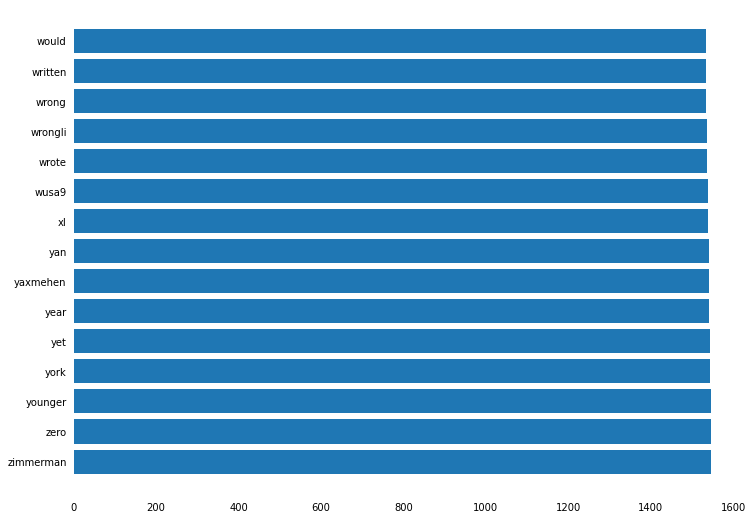

In [71]:
top_word_list = word_list[:15]
top_freq_list = freq_list[:15]

fig, ax = plt.subplots(figsize =(12, 9))
ax.barh(top_word_list, top_freq_list)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
plt.show()